In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.datasets import cifar100

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, Adadelta
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import math
import os

from google.colab import drive

%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import transforms
from keras.preprocessing import image

In [3]:
!unzip 'drive/MyDrive/Нейросети/citys.zip'

Archive:  drive/MyDrive/Нейросети/citys.zip
   creating: citys/New York/
  inflating: citys/New York/1009323-sunlight-lights-street-light-sunset-city-cityscape-night-reflection-long-exposure-skyline-skyscraper-evening-morning-bridge-New-York-City-clear-sky-dusk-light-lighting-.jpg  
  inflating: citys/New York/1017193-architecture-symmetry-skyscraper-New-York-City-interior-design-Fulton-Center-shape-design-line-window-covering-window-blind.jpg  
  inflating: citys/New York/1021487-sunset-city-cityscape-night-skycrapers-urban-reflection-sunrise-skyline-skyscraper-evening-morning-New-York-City-horizon-dusk-Manhattan-metropolis-haze-downtown-dawn-at.jpg  
  inflating: citys/New York/1033014-white-black-old-monochrome-city-street-cityscape-architecture-road-history-New-York-City-town-metropolis-street-style-infrastructure-downtown-alley-urban-area-black-and.jpg  
  inflating: citys/New York/1046699-cityscape-night-nature-building-reflection-lightning-evening-New-York-City-atmosphere-dusk-t

In [4]:
classes = ['New York', 'Paris', 'Tokyo']

In [5]:
train_path = '/content/citys'
batch_size = 25
img_width = 96
img_height = 54

In [6]:
datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.1
)

In [7]:
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)


validation_generator = datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)

Found 146 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [8]:
from keras.preprocessing import image
import keras.utils as image

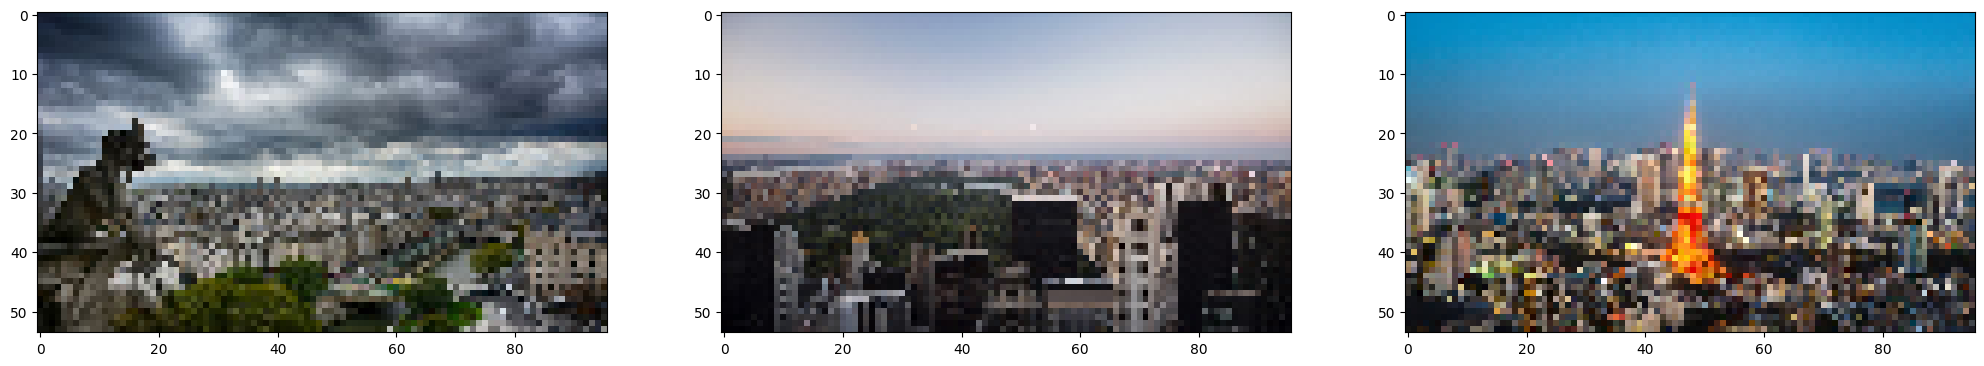

In [32]:
fig, axs = plt.subplots(1, 3, figsize=(25, 5))
for i in range(3):
  city_path = train_path + '/' + os.listdir(train_path)[i] + '/'
  img_path = city_path + random.choice(os.listdir(city_path))
  axs[i].imshow(image.load_img(img_path, target_size=(img_height, img_width)))

plt.show()

In [17]:
model = Sequential()
model.add(Conv2D(256, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model.add(Conv2D(1024, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(len(train_generator.class_indices), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001), metrics=['accuracy'])

In [18]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs=45,
    verbose=1
)


<ipython-input-18-0ce07fe8454d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/45
5/5 [==============================] - 73s 14s/step - loss: 1.1403 - accuracy: 0.3306
Epoch 2/45
5/5 [==============================] - 64s 12s/step - loss: 1.1009 - accuracy: 0.3058
Epoch 3/45
5/5 [==============================] - 63s 12s/step - loss: 1.0951 - accuracy: 0.3802
Epoch 4/45
5/5 [==============================] - 61s 12s/step - loss: 1.0986 - accuracy: 0.3471
Epoch 5/45
5/5 [==============================] - 63s 12s/step - loss: 1.0938 - accuracy: 0.3600
Epoch 6/45
5/5 [==============================] - 61s 12s/step - loss: 1.0933 - accuracy: 0.3471
Epoch 7/45
5/5 [==============================] - 63s 12s/step - loss: 1.0923 - accuracy: 0.3600
Epoch 8/45
5/5 [==============================] - 61s 12s/step - loss: 1.0943 - accuracy: 0.3306
Epoch 9/45
5/5 [==============================] - 63s 12s/step - loss: 1.0809 - accuracy: 0.4880
Epoch 10/45
5/5 [==============================] - 61s 12s/step - loss: 1.0834 - accuracy: 0.3802
Epoch 11/45
5/5 [============

In [19]:
conv = model.layers[0]

In [20]:
x = validation_generator.next()[0][0]
x = x[None]

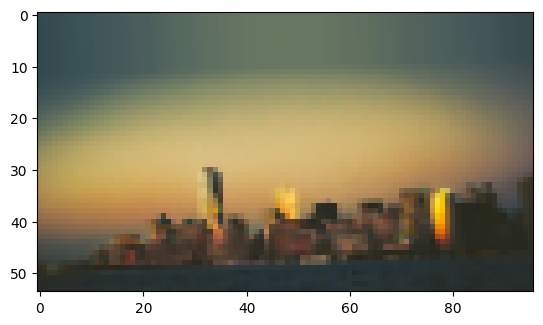

In [21]:
plt.imshow(x[0])

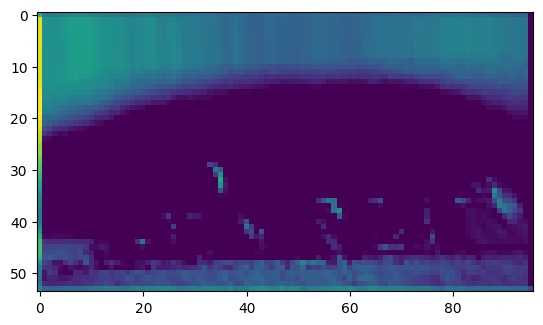

In [22]:
n_filter = 9
plt.imshow(conv(x)[0,:,:,n_filter])

In [14]:
class_correct = list(1. for i in range(10))
class_total = list(1. for i in range(10))

In [15]:
print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of Tokyo : 100 %
